# DMAC Analysis for Tesla (TSLA)
In this notebook, we analyze the Dual Moving Average Crossover (DMAC) strategy for Tesla's stock price.

### Introduction:
The Dual Moving Average Crossover (DMAC) is a popular trend-following strategy used in technical analysis. It involves tracking two moving averages: a short-term average and a long-term average. When the short-term average crosses above the long-term average, it signals a potential bullish trend, known as the "Golden Cross". Conversely, when the short-term average crosses below the long-term average, it indicates a potential bearish trend, termed as the "Death Cross". In this notebook, we'll explore the DMAC strategy using Tesla's stock price data to identify potential buying and selling opportunities.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import yfinance as yf

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


---

### Fetching Data

Historical stock price data for Tesla, Inc. (`TSLA`) is fetched from Yahoo Finance for a specified date range. This data will be the foundation for all subsequent analyses and strategy simulations.

In [2]:
tickerSymbol = 'TSLA'
tickerData = yf.Ticker(tickerSymbol)
price = tickerData.history(period='1d', start='2020-8-20', end='2022-8-20')

---

### Moving Averages Calculation

The short-term (5-day) and long-term (20-day) moving averages of Tesla's closing stock prices are calculated. These moving averages will be crucial in identifying potential trading signals, specifically the 'Golden Cross' and 'Death Cross' events.


In [3]:
df_ma = pd.DataFrame()
df_ma['ma5'] = price['Close'].rolling(5).mean()
df_ma['ma20'] = price['Close'].rolling(20).mean()

---

### Data Preparation for Cross Analysis

A new dataframe is created to capture the difference between the fast (5-day) and slow (20-day) moving averages for both the current and previous days. This will be instrumental in pinpointing cross events, which are pivotal points for the trading strategy.



In [4]:
df_new = pd.DataFrame()
df_new['ma_fast_today'] = df_ma['ma5']
df_new['ma_slow_today'] = df_ma['ma20']
df_new['value_today'] = df_new['ma_fast_today'] - df_new['ma_slow_today']
df_new['value_yesterday'] = df_new['value_today'].shift(1)

---

### Identifying Golden and Death Crosses

"Golden Cross" and "Death Cross" events are central to this trading strategy:
- A "Golden Cross" is a bullish signal where the 5-day moving average surpasses the 20-day moving average, typically indicating potential upward price movement.
- Conversely, a "Death Cross" is a bearish signal where the 5-day moving average falls below the 20-day moving average, typically hinting at potential downward price movement.



In [5]:
df_new['golden_cross'] = np.where((df_new['value_today'] > 0) & (df_new['value_yesterday'] < 0), 1, 0)
df_new['death_cross'] = np.where((df_new['value_today'] < 0) & (df_new['value_yesterday'] > 0), 1, 0)

---

### Visualization of Moving Averages and Cross Events

The moving averages and cross events are visualized to provide a clear representation of market trends. Such visual aids help in understanding the evolution of stock prices in relation to the moving averages and in spotting the exact points where 'Golden Cross' and 'Death Cross' events transpire.



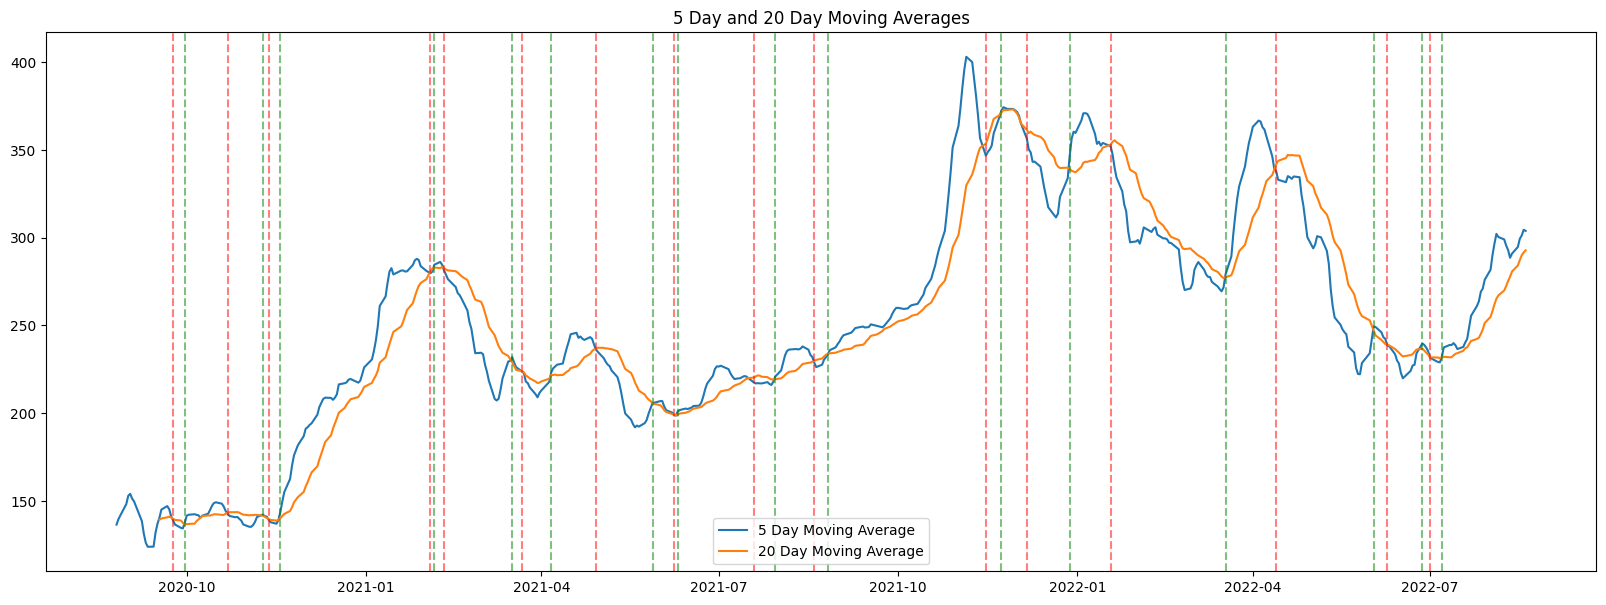

In [6]:
plt.figure(figsize=(20, 7))
plt.plot(df_ma['ma5'], label='5 Day Moving Average')
plt.plot(df_ma['ma20'], label='20 Day Moving Average')
golden_crosses = df_new[df_new['golden_cross'] == 1].index
for cross in golden_crosses:
    plt.axvline(x=cross, color='green', linestyle='--', alpha=0.5)
death_crosses = df_new[df_new['death_cross'] == 1].index
for cross in death_crosses:
    plt.axvline(x=cross, color='red', linestyle='--', alpha=0.5)
plt.title('5 Day and 20 Day Moving Averages')
plt.legend()
plt.show()

Look for intersections between the short-term and long-term moving averages. A 'Golden Cross' (short-term MA moving above the long-term MA) is typically a bullish signal, suggesting an upward price movement. Conversely, a 'Death Cross' (short-term MA moving below the long-term MA) is generally a bearish signal, indicating potential downward price movement. The efficacy of these signals can be assessed by observing the actual price movement after these events.

---

### Implementing a Trading Strategy Based on Cross Events

A simple trading strategy is put into action based on the 'Golden Cross' and 'Death Cross' events. The mechanics are straightforward:
- Buy shares of the stock when a 'Golden Cross' event occurs.
- Sell any held shares when a 'Death Cross' event takes place.



In [7]:
df_new['strategy'] = 100000
cash = 100000
position = 0
for i in range(len(price)):
    if df_new['golden_cross'].iloc[i] == 1:
        shares = cash // price['Close'].iloc[i]
        position += shares
        cash -= shares * price['Close'].iloc[i]
    if df_new['death_cross'].iloc[i] == 1:
        cash += position * price['Close'].iloc[i]
        position = 0
    df_new['strategy'].iloc[i] = cash + position * price['Close'].iloc[i]

<ipython-input-7-8738cca0a2cb>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['strategy'].iloc[i] = cash + position * price['Close'].iloc[i]


---

### Buy and Hold Strategy Implementation

For comparison, a 'Buy and Hold' strategy is also simulated. This strategy entails purchasing shares at the onset of the trading period and retaining them until its conclusion. The performance of both strategies is subsequently compared.



In [8]:
shares_buy_hold = 100000 / price['Close'].iloc[0]
df_new['buy_hold'] = shares_buy_hold * price['Close']

---
### Comparative Analysis of Returns

To ascertain the most profitable strategy, we juxtapose the returns from the 'Golden Cross/Death Cross' strategy against the 'Buy and Hold' strategy. This comparative analysis is visualized over time, with distinct markers highlighting 'Golden Cross' and 'Death Cross' events.


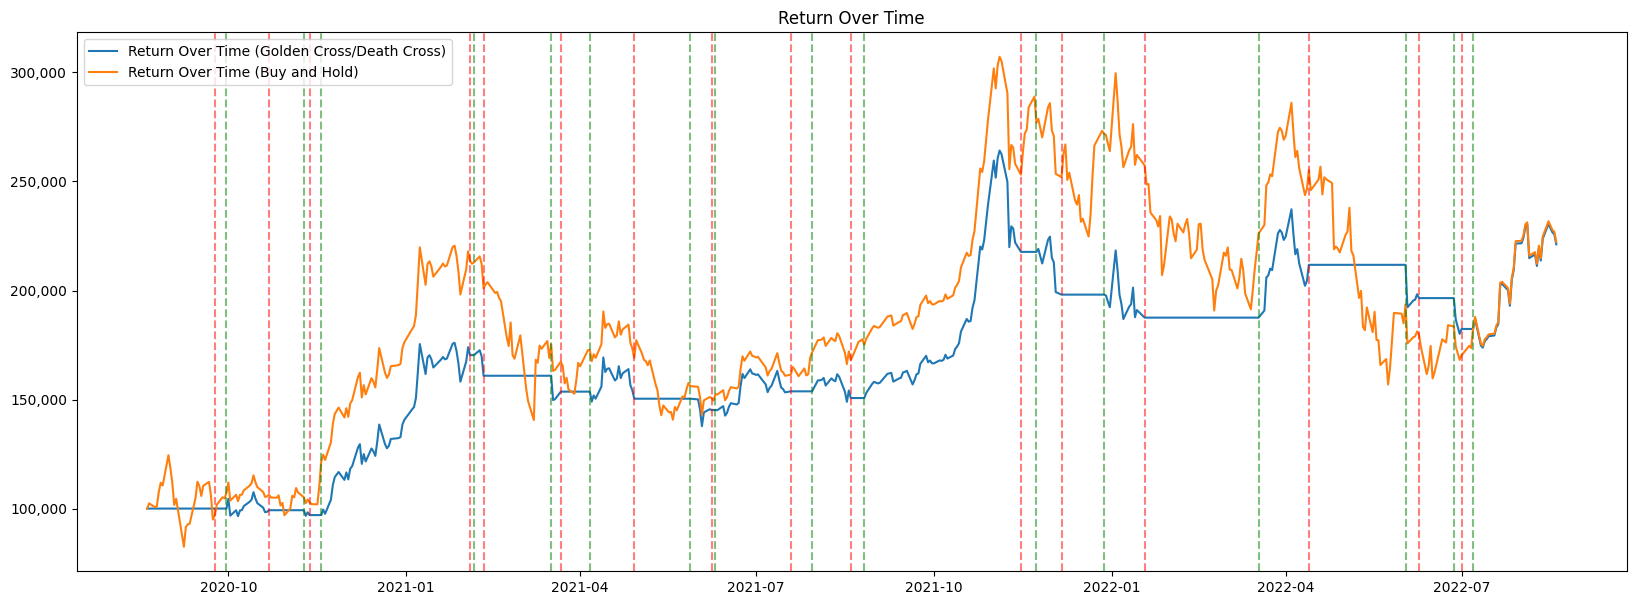

In [9]:
fig, ax = plt.subplots(figsize=(20, 7))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.plot(df_new['strategy'], label='Return Over Time (Golden Cross/Death Cross)')
plt.plot(df_new['buy_hold'], label='Return Over Time (Buy and Hold)')

for cross in golden_crosses:
    plt.axvline(x=cross, color='green', linestyle='--', alpha=0.5)

for cross in death_crosses:
    plt.axvline(x=cross, color='red', linestyle='--', alpha=0.5)

plt.title('Return Over Time')
plt.legend()
plt.show()


- This graph visualizes the 5-day (short-term) and 20-day (long-term) moving averages of Tesla's closing prices.
- The green dashed lines represent "Golden Crosses" where the 5-day moving average crosses above the 20-day moving average. This is typically seen as a bullish signal.
- The red dashed lines represent "Death Crosses" where the 5-day moving average crosses below the 20-day moving average. This is typically seen as a bearish signal.
- The intersections of these moving averages can be used as signals for potential buying or selling opportunities.

The objective is to determine which strategy outperforms the other. If the cross event-based strategy consistently outperforms the 'Buy and Hold' approach, it suggests that reacting to these cross events can yield better returns. However, if the 'Buy and Hold' strategy performs comparably or better, it indicates that the added complexity of the cross event-based strategy might not be justified. In the end we found that our 5-day MA and 20-day MA might not be our best option. We then move on to find the best MA curves.


---

### Identifying the Best Moving Average Combination

The goal here is to discern the optimal combination of short and long moving averages that yields the most profit. This is achieved by testing various combinations, applying the 'Golden Cross'/'Death Cross' strategy for each combination, and consolidating the final profits in a results matrix. The outcomes are depicted using a heatmap.

**We tried the short MA curve from 5-30 days with step size of 5 days, and the long MA curve from 20 to 100 days, with step size of 10 days.**



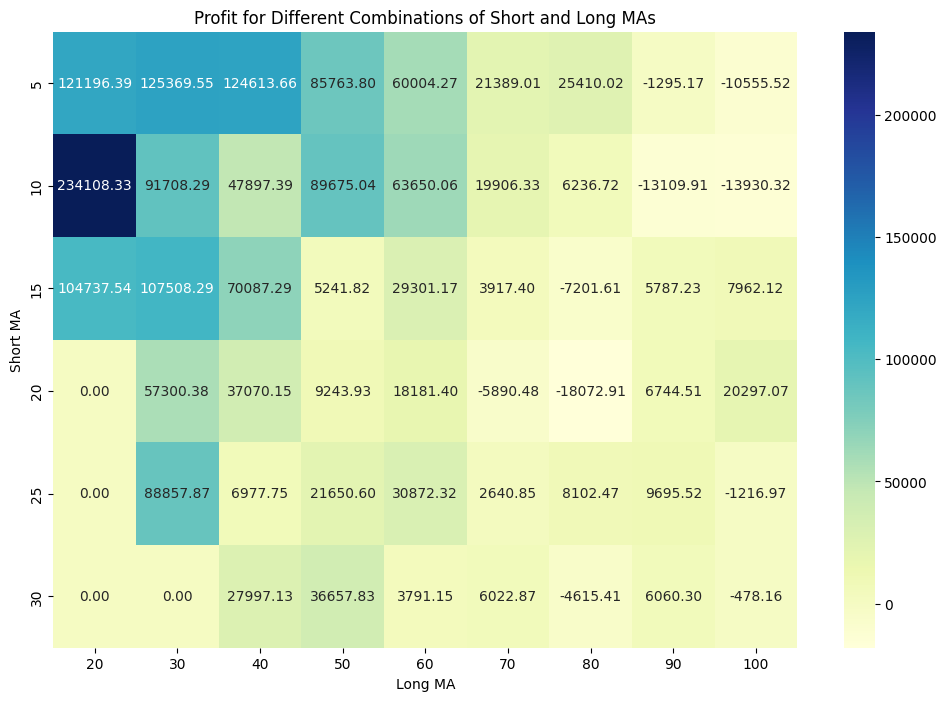

In [10]:
import seaborn as sns

short_ma_range = range(5, 31, 5)
long_ma_range = range(20, 101, 10)
results_matrix = np.zeros((len(short_ma_range), len(long_ma_range)))
for i, short_ma in enumerate(short_ma_range):
    for j, long_ma in enumerate(long_ma_range):
        if short_ma >= long_ma:
            continue

        df_ma['ma_short'] = price['Close'].rolling(short_ma).mean()
        df_ma['ma_long'] = price['Close'].rolling(long_ma).mean()

        df_new['value_today'] = df_ma['ma_short'] - df_ma['ma_long']
        df_new['value_yesterday'] = df_new['value_today'].shift(1)
        df_new['golden_cross'] = np.where((df_new['value_today'] > 0) & (df_new['value_yesterday'] < 0), 1, 0)
        df_new['death_cross'] = np.where((df_new['value_today'] < 0) & (df_new['value_yesterday'] > 0), 1, 0)

        cash = 100000
        position = 0
        for k in range(len(price)):
            if df_new['golden_cross'].iloc[k] == 1:
                shares = cash // price['Close'].iloc[k]
                position += shares
                cash -= shares * price['Close'].iloc[k]
            if df_new['death_cross'].iloc[k] == 1:
                cash += position * price['Close'].iloc[k]
                position = 0

        final_value = cash + position * price['Close'].iloc[-1]-100000
        results_matrix[i, j] = final_value

plt.figure(figsize=(12, 8))
sns.heatmap(results_matrix, annot=True, fmt='.2f', cmap='YlGnBu', xticklabels=long_ma_range, yticklabels=short_ma_range)
plt.xlabel('Long MA')
plt.ylabel('Short MA')
plt.title('Profit for Different Combinations of Short and Long MAs')
plt.show()

---

### Strategy Implementation Using the Best Combination

The steps encapsulated here involve:
- Pinpointing the optimal moving average combination from the heatmap.
- Recomputing the moving averages using this identified combination.
- Applying the 'Golden Cross'/'Death Cross' strategy using these new moving averages and calculating the resultant profit.
- Contrasting this with the profit from the 'Buy and Hold' strategy.
- Visualizing the profits over time for both strategies, offering a comparative perspective.



<ipython-input-11-e106a086d2a1>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['strategy'].iloc[i] = cash + position * price['Close'].iloc[i]


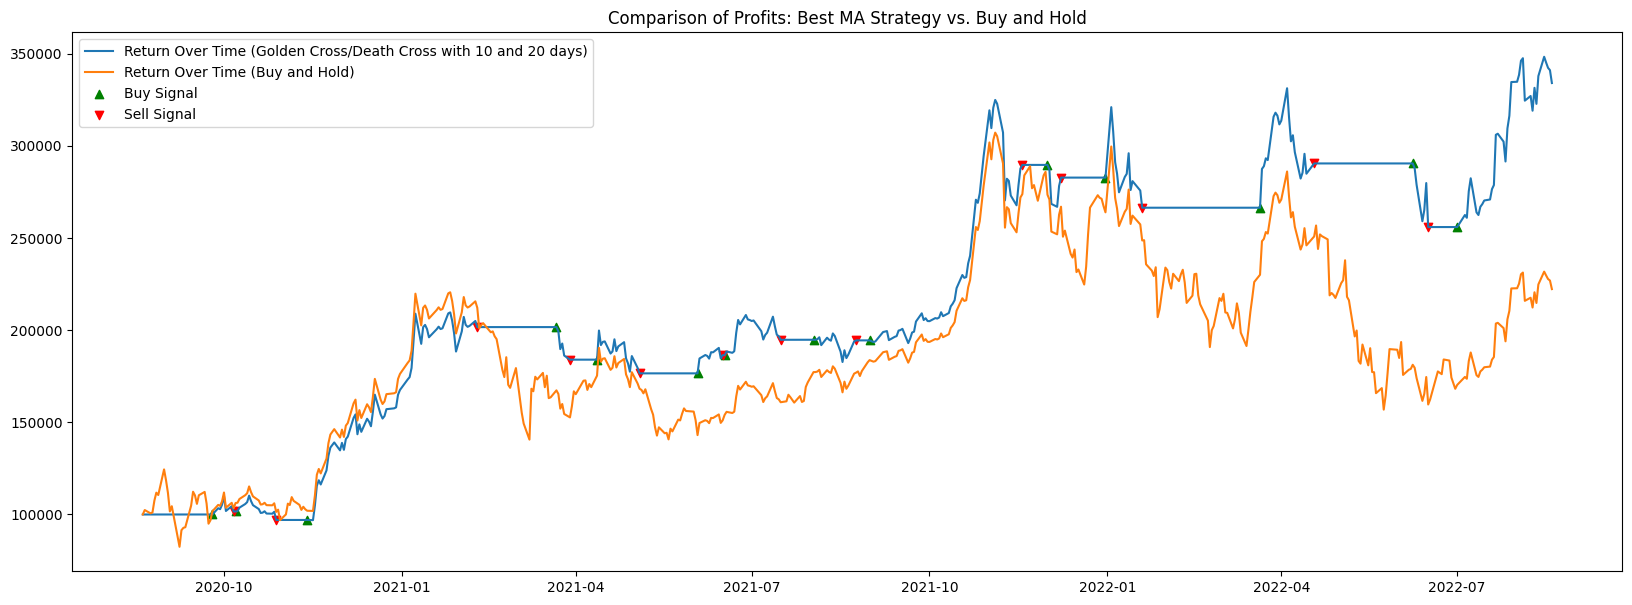

In [11]:
# Identify the best MA combination
best_short_ma_index, best_long_ma_index = np.unravel_index(results_matrix.argmax(), results_matrix.shape)
best_short_ma = short_ma_range[best_short_ma_index]
best_long_ma = long_ma_range[best_long_ma_index]

# Recompute the moving averages using the best combination
df_ma['ma_short'] = price['Close'].rolling(best_short_ma).mean()
df_ma['ma_long'] = price['Close'].rolling(best_long_ma).mean()

# Implement the Golden Cross/Death Cross strategy
df_new['value_today'] = df_ma['ma_short'] - df_ma['ma_long']
df_new['value_yesterday'] = df_new['value_today'].shift(1)
df_new['golden_cross'] = np.where((df_new['value_today'] > 0) & (df_new['value_yesterday'] < 0), 1, 0)
df_new['death_cross'] = np.where((df_new['value_today'] < 0) & (df_new['value_yesterday'] > 0), 1, 0)

cash = 100000
position = 0
df_new['strategy'] = 0
for i in range(len(price)):
    if df_new['golden_cross'].iloc[i] == 1:
        shares = cash // price['Close'].iloc[i]
        position += shares
        cash -= shares * price['Close'].iloc[i]
    if df_new['death_cross'].iloc[i] == 1:
        cash += position * price['Close'].iloc[i]
        position = 0
    df_new['strategy'].iloc[i] = cash + position * price['Close'].iloc[i]

# Implement the Buy and Hold strategy
shares_buy_hold = 100000 / price['Close'].iloc[0]
df_new['buy_hold'] = shares_buy_hold * price['Close']

plt.figure(figsize=(20, 7))
plt.plot(df_new['strategy'], label=f'Return Over Time (Golden Cross/Death Cross with {best_short_ma} and {best_long_ma} days)')
plt.plot(df_new['buy_hold'], label='Return Over Time (Buy and Hold)')

buy_dates = df_new[df_new['golden_cross'] == 1].index
sell_dates = df_new[df_new['death_cross'] == 1].index
plt.scatter(buy_dates, df_new['strategy'].loc[buy_dates], marker='^', color='g', alpha=1, label='Buy Signal')
plt.scatter(sell_dates, df_new['strategy'].loc[sell_dates], marker='v', color='r', alpha=1, label='Sell Signal')

plt.title('Comparison of Profits: Best MA Strategy vs. Buy and Hold')
plt.legend()
plt.show()


---
### Testing the Best Moving Averages on New Data (2022-8-20 to 2023-8-20)
In this section, we will apply the best moving averages (best_long_ma and best_short_ma) identified from the previous analysis to the new data. We will then evaluate the strategy's performance using metrics such as return, Sharpe ratio, and maximum drawdown.


<ipython-input-12-15a2d696f09d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_2023['strategy'].iloc[i] = cash + position * price_2023['Close'].iloc[i]


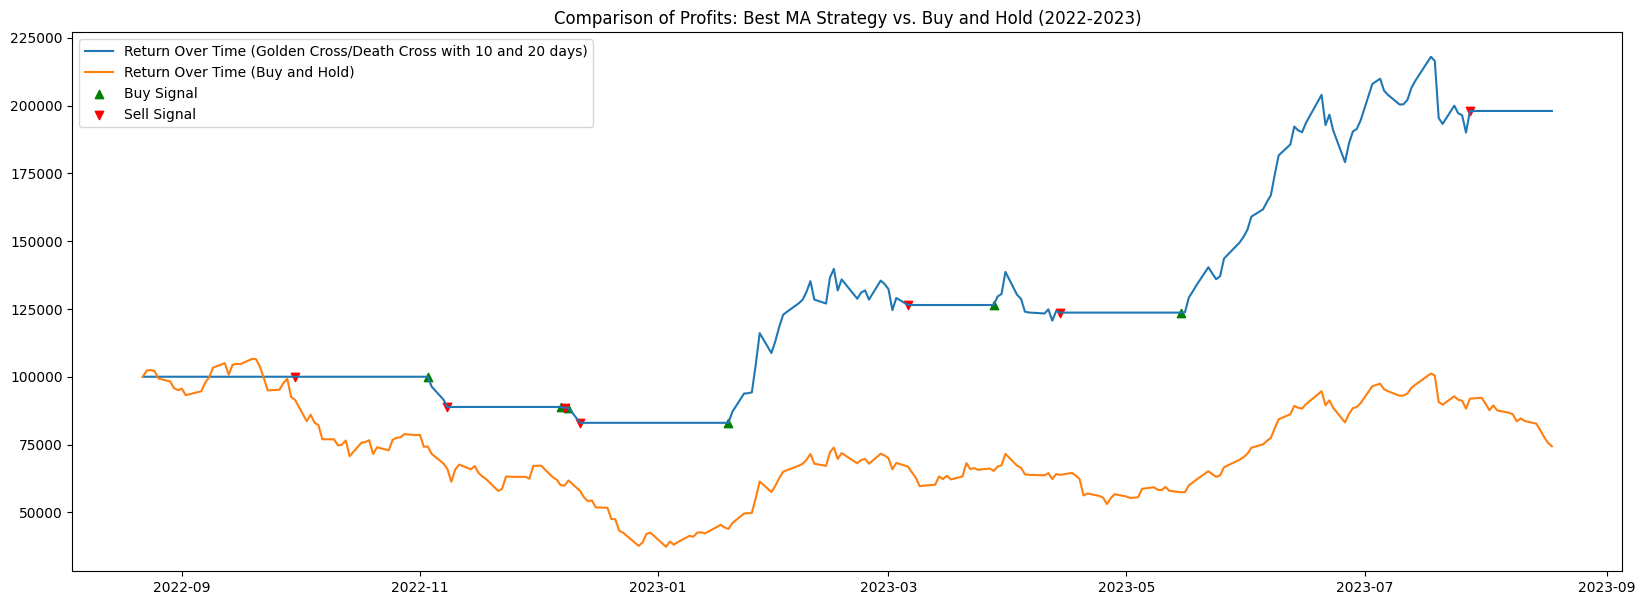

In [12]:
price_2023 = tickerData.history(period='1d', start='2022-8-20', end='2023-8-20')
df_ma_2023 = pd.DataFrame()
df_ma_2023['ma_short'] = price_2023['Close'].rolling(best_short_ma).mean()
df_ma_2023['ma_long'] = price_2023['Close'].rolling(best_long_ma).mean()

# Implement the Golden Cross/Death Cross strategy
df_new_2023 = pd.DataFrame()
df_new_2023['value_today'] = df_ma_2023['ma_short'] - df_ma_2023['ma_long']
df_new_2023['value_yesterday'] = df_new_2023['value_today'].shift(1)
df_new_2023['golden_cross'] = np.where((df_new_2023['value_today'] > 0) & (df_new_2023['value_yesterday'] < 0), 1, 0)
df_new_2023['death_cross'] = np.where((df_new_2023['value_today'] < 0) & (df_new_2023['value_yesterday'] > 0), 1, 0)

cash = 100000
position = 0
df_new_2023['strategy'] = 0
for i in range(len(price_2023)):
    if df_new_2023['golden_cross'].iloc[i] == 1:
        shares = cash // price_2023['Close'].iloc[i]
        position += shares
        cash -= shares * price_2023['Close'].iloc[i]
    if df_new_2023['death_cross'].iloc[i] == 1:
        cash += position * price_2023['Close'].iloc[i]
        position = 0
    df_new_2023['strategy'].iloc[i] = cash + position * price_2023['Close'].iloc[i]

# Implement the Buy and Hold strategy
shares_buy_hold = 100000 / price_2023['Close'].iloc[0]
df_new_2023['buy_hold'] = shares_buy_hold * price_2023['Close']

# Visualize the profits
plt.figure(figsize=(20, 7))
plt.plot(df_new_2023['strategy'], label=f'Return Over Time (Golden Cross/Death Cross with {best_short_ma} and {best_long_ma} days)')
plt.plot(df_new_2023['buy_hold'], label='Return Over Time (Buy and Hold)')

# Add dots for transactions
buy_dates = df_new_2023[df_new_2023['golden_cross'] == 1].index
sell_dates = df_new_2023[df_new_2023['death_cross'] == 1].index
plt.scatter(buy_dates, df_new_2023['strategy'].loc[buy_dates], marker='^', color='g', alpha=1, label='Buy Signal')
plt.scatter(sell_dates, df_new_2023['strategy'].loc[sell_dates], marker='v', color='r', alpha=1, label='Sell Signal')

plt.title('Comparison of Profits: Best MA Strategy vs. Buy and Hold (2022-2023)')
plt.legend()
plt.show()


In [13]:
# Calculate DMAC strategy Sharpe ratio and drawback
tickerSymbolInterestRate = '^IRX'
tickerData = yf.Ticker(tickerSymbolInterestRate)
interest_rates_2023 = tickerData.history(period='1d', start='2022-8-20', end='2023-8-20')

# Convert the annual interest rate to a daily rate
interest_rates_2023['Daily_Rate'] = interest_rates_2023['Close'] / 100 / 252  # Assuming 252 trading days in a year

# Calculate the daily returns of the strategy
daily_returns_2023 = df_new_2023['strategy'].pct_change().dropna()

# Match the dates of the strategy returns and the interest rates
aligned_data = pd.concat([daily_returns_2023, interest_rates_2023['Daily_Rate']], axis=1).dropna()

# Calculate the excess returns (Strategy returns - Risk-free rate)
excess_returns = aligned_data['strategy'] - aligned_data['Daily_Rate']

# Calculate the Sharpe Ratio
sharpe_ratio = excess_returns.mean() / excess_returns.std() * (252 ** 0.5)  # Annualizing the Sharpe Ratio

# Calculate the Maximum Drawdown
rolling_max = df_new_2023['strategy'].cummax()
daily_drawdown = df_new_2023['strategy'] / rolling_max - 1.0
max_daily_drawdown = daily_drawdown.cummin()

sharpe_ratio, max_daily_drawdown.min()


(1.9066975540530404, -0.16994250671386724)

In [14]:
# Calculate buy-and-hold strategy Sharpe ratio and drawback
tsla_daily_returns_2023 = price_2023['Close'].pct_change().dropna()

aligned_data_tsla = pd.concat([tsla_daily_returns_2023, interest_rates_2023['Daily_Rate']], axis=1).dropna()

tsla_excess_returns = aligned_data_tsla['Close'] - aligned_data_tsla['Daily_Rate']

tsla_sharpe_ratio = tsla_excess_returns.mean() / tsla_excess_returns.std() * (252 ** 0.5)  # Annualizing the Sharpe Ratio

tsla_rolling_max = price_2023['Close'].cummax()
tsla_daily_drawdown = price_2023['Close'] / tsla_rolling_max - 1.0
tsla_max_daily_drawdown = tsla_daily_drawdown.cummin()

tsla_sharpe_ratio, tsla_max_daily_drawdown.min()


(-0.2797166266775185, -0.6502410589432488)

#### Analysis of the Sharpe Ratio:

The Sharpe ratio is a measure used to understand the return of an investment compared to its risk. The higher the value, the better the risk-adjusted performance.

Given that the Sharpe ratio for this strategy is ***1.9067***:

- **Interpretation**: This is a relatively high Sharpe ratio, indicating that the investment has provided a significant return for the level of risk taken, comparing with buy-and-hold strategy of -0.2797. Generally, a Sharpe ratio greater than 1 is considered acceptable to good by investors, and greater than 2 is very good.
- **Context**: A Sharpe ratio of 1.9067 suggests that the strategy's returns, when adjusted for risk, have been robust. It means that, on average, the strategy has returned approximately 1.9067 units of return for each unit of risk undertaken.

#### Analysis of Maximum Drawdown:

Maximum drawdown is the largest single drop from peak to bottom in the value of a portfolio, so it gives us an idea about the worst-case scenario for a potential loss.

Given that the maximum drawdown for this strategy is ***16.994%***:

- **Interpretation**: A 16.994% maximum drawdown means that, from its peak, the portfolio saw a decline of nearly 17% at its worst point before rebounding. While this might seem significant, the drawdown is still acceptable, comparing with 65.02% of buy-and-hold strategy.
- **Context**: For aggressive trading strategies, a drawdown of 17% might be considered par for the course, especially if the overall returns are high. However, for more conservative investors or strategies, such a drawdown might be deemed unacceptable.


---


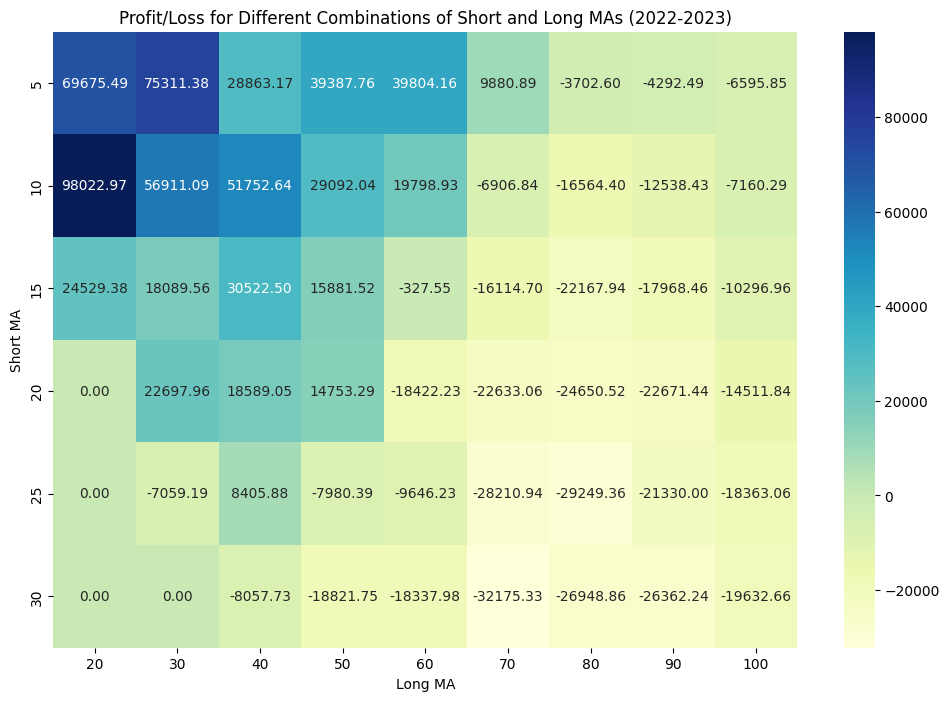

In [15]:
short_ma_range = range(5, 31, 5)
long_ma_range = range(20, 101, 10)
results_matrix_2023_v2 = np.zeros((len(short_ma_range), len(long_ma_range)))

for i, short_ma in enumerate(short_ma_range):
    for j, long_ma in enumerate(long_ma_range):
        if short_ma >= long_ma:
            continue

        df_ma_2023_v2 = pd.DataFrame()
        df_ma_2023_v2['ma_short'] = price_2023['Close'].rolling(short_ma).mean()
        df_ma_2023_v2['ma_long'] = price_2023['Close'].rolling(long_ma).mean()

        df_new_2023_v2 = pd.DataFrame()
        df_new_2023_v2['value_today'] = df_ma_2023_v2['ma_short'] - df_ma_2023_v2['ma_long']
        df_new_2023_v2['value_yesterday'] = df_new_2023_v2['value_today'].shift(1)
        df_new_2023_v2['golden_cross'] = np.where((df_new_2023_v2['value_today'] > 0) & (df_new_2023_v2['value_yesterday'] < 0), 1, 0)
        df_new_2023_v2['death_cross'] = np.where((df_new_2023_v2['value_today'] < 0) & (df_new_2023_v2['value_yesterday'] > 0), 1, 0)

        cash = 100000
        position = 0
        for k in range(len(price_2023)):
            if df_new_2023_v2['golden_cross'].iloc[k] == 1:
                shares = cash // price_2023['Close'].iloc[k]
                position += shares
                cash -= shares * price_2023['Close'].iloc[k]
            if df_new_2023_v2['death_cross'].iloc[k] == 1:
                cash += position * price_2023['Close'].iloc[k]
                position = 0

        final_value = cash + position * price_2023['Close'].iloc[-1]
        results_matrix_2023_v2[i, j] = final_value - 100000

plt.figure(figsize=(12, 8))
sns.heatmap(results_matrix_2023_v2, annot=True, fmt='.2f', cmap='YlGnBu', xticklabels=long_ma_range, yticklabels=short_ma_range)
plt.xlabel('Long MA')
plt.ylabel('Short MA')
plt.title('Profit/Loss for Different Combinations of Short and Long MAs (2022-2023)')
plt.show()


By conducting a grid search on the 2022-2023 data to identify the optimal MA curves, we reaffirmed our previous findings. The combination of a **10-day and 20-day MA** consistently yields the maximum profit.



---
### Comprehensive Analysis: Combining Data from 2020 to 2023

To obtain a holistic view of our trading strategy's performance, we combine data spanning from 2020 to 2023. By doing this, we aim to gauge the consistency and robustness of our strategy across a broader timeframe, rather than evaluating it in isolated periods.


<ipython-input-16-8dcdc7aabc5c>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_combined['strategy'].iloc[i] = cash + position * combined_price['Close'].iloc[i]


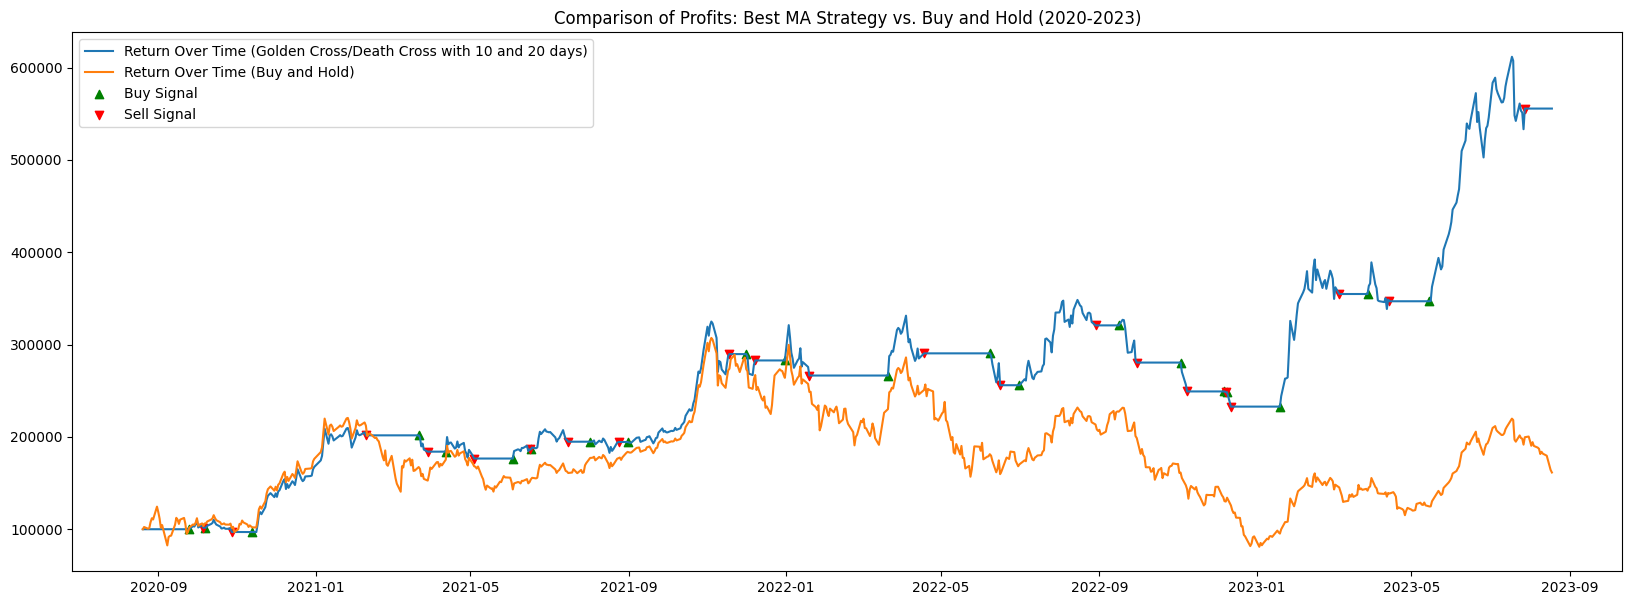

In [16]:
combined_price = pd.concat([price, price_2023])
df_ma_combined = pd.DataFrame()
df_ma_combined['ma_short'] = combined_price['Close'].rolling(best_short_ma).mean()
df_ma_combined['ma_long'] = combined_price['Close'].rolling(best_long_ma).mean()

df_new_combined = pd.DataFrame()
df_new_combined['value_today'] = df_ma_combined['ma_short'] - df_ma_combined['ma_long']
df_new_combined['value_yesterday'] = df_new_combined['value_today'].shift(1)
df_new_combined['golden_cross'] = np.where((df_new_combined['value_today'] > 0) & (df_new_combined['value_yesterday'] < 0), 1, 0)
df_new_combined['death_cross'] = np.where((df_new_combined['value_today'] < 0) & (df_new_combined['value_yesterday'] > 0), 1, 0)

cash = 100000
position = 0
df_new_combined['strategy'] = 0
for i in range(len(combined_price)):
    if df_new_combined['golden_cross'].iloc[i] == 1:
        shares = cash // combined_price['Close'].iloc[i]
        position += shares
        cash -= shares * combined_price['Close'].iloc[i]
    if df_new_combined['death_cross'].iloc[i] == 1:
        cash += position * combined_price['Close'].iloc[i]
        position = 0
    df_new_combined['strategy'].iloc[i] = cash + position * combined_price['Close'].iloc[i]

shares_buy_hold = 100000 / combined_price['Close'].iloc[0]
df_new_combined['buy_hold'] = shares_buy_hold * combined_price['Close']

plt.figure(figsize=(20, 7))
plt.plot(df_new_combined['strategy'], label=f'Return Over Time (Golden Cross/Death Cross with {best_short_ma} and {best_long_ma} days)')
plt.plot(df_new_combined['buy_hold'], label='Return Over Time (Buy and Hold)')

buy_dates = df_new_combined[df_new_combined['golden_cross'] == 1].index
sell_dates = df_new_combined[df_new_combined['death_cross'] == 1].index
plt.scatter(buy_dates, df_new_combined['strategy'].loc[buy_dates], marker='^', color='g', alpha=1, label='Buy Signal')
plt.scatter(sell_dates, df_new_combined['strategy'].loc[sell_dates], marker='v', color='r', alpha=1, label='Sell Signal')

plt.title('Comparison of Profits: Best MA Strategy vs. Buy and Hold (2020-2023)')
plt.legend()
plt.show()


**Profit Graph**: This graph juxtaposes the profit trajectory of our best MA strategy (determined from the heatmap) against a traditional Buy and Hold strategy. By marking our buy and sell points on the graph, we can vividly see where our strategy has decided to make trades. This comparison helps us understand whether actively trading based on MA crossovers leads to more favorable outcomes than a passive investment approach.


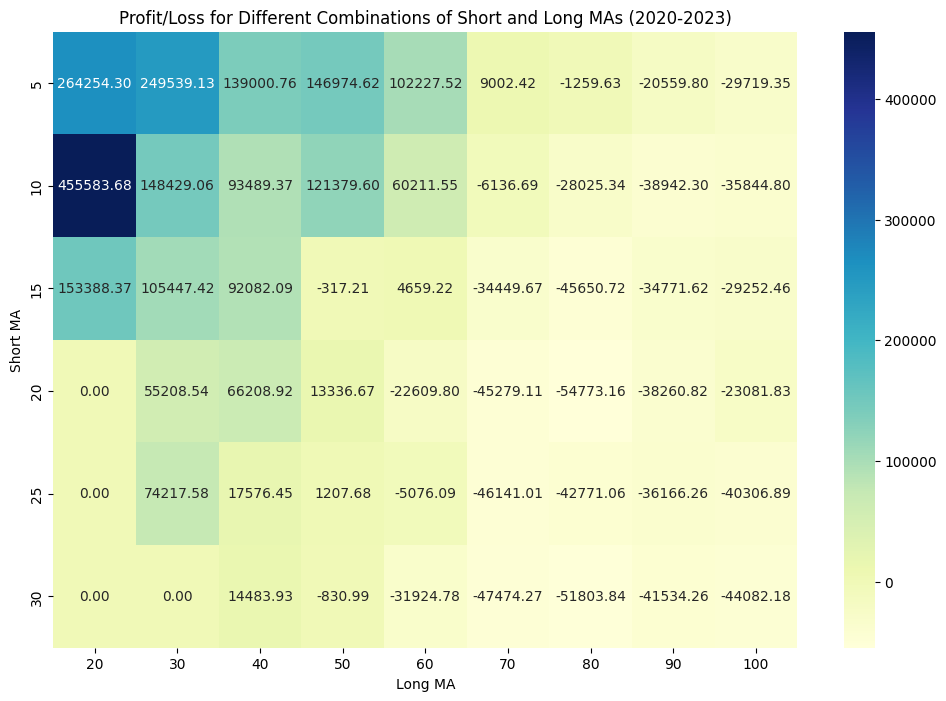

In [17]:
results_matrix_combined = np.zeros((len(short_ma_range), len(long_ma_range)))

for i, short_ma in enumerate(short_ma_range):
    for j, long_ma in enumerate(long_ma_range):
        if short_ma >= long_ma:
            continue

        df_ma_combined = pd.DataFrame()
        df_ma_combined['ma_short'] = combined_price['Close'].rolling(short_ma).mean()
        df_ma_combined['ma_long'] = combined_price['Close'].rolling(long_ma).mean()

        df_new_combined = pd.DataFrame()
        df_new_combined['value_today'] = df_ma_combined['ma_short'] - df_ma_combined['ma_long']
        df_new_combined['value_yesterday'] = df_new_combined['value_today'].shift(1)
        df_new_combined['golden_cross'] = np.where((df_new_combined['value_today'] > 0) & (df_new_combined['value_yesterday'] < 0), 1, 0)
        df_new_combined['death_cross'] = np.where((df_new_combined['value_today'] < 0) & (df_new_combined['value_yesterday'] > 0), 1, 0)

        cash = 100000
        position = 0
        for k in range(len(combined_price)):
            if df_new_combined['golden_cross'].iloc[k] == 1:
                shares = cash // combined_price['Close'].iloc[k]
                position += shares
                cash -= shares * combined_price['Close'].iloc[k]
            if df_new_combined['death_cross'].iloc[k] == 1:
                cash += position * combined_price['Close'].iloc[k]
                position = 0

        final_value = cash + position * combined_price['Close'].iloc[-1]
        results_matrix_combined[i, j] = final_value - 100000

plt.figure(figsize=(12, 8))
sns.heatmap(results_matrix_combined, annot=True, fmt='.2f', cmap='YlGnBu', xticklabels=long_ma_range, yticklabels=short_ma_range)
plt.xlabel('Long MA')
plt.ylabel('Short MA')
plt.title('Profit/Loss for Different Combinations of Short and Long MAs (2020-2023)')
plt.show()


**Heatmap Visualization**: This visualization provides an exhaustive grid search of profit or loss outcomes across different combinations of short and long moving averages (MAs). By inspecting the heatmap, we can discern that **10-day and 20-day** MA combination consistently yields the best outcomes over the entire period. Darker shades indicate higher profits, while lighter shades may point to losses or minimal gains.


---
### Summary
The Dual Moving Average Crossover (DMAC) strategy is a powerful tool for traders to identify potential bullish and bearish market trends. Using Tesla's stock price data, we observed the occurrences of golden and death crosses and how they can be used to devise trading strategies. We also compared the returns of the DMAC strategy with a traditional buy and hold approach. While the DMAC strategy can provide clear buy and sell signals during trending markets, it's essential to use it in conjunction with other tools and analyses to make informed trading decisions.